**Recurrent Neural Network in Python using TensorFlow**

This notebook has as objective to build a non-linear regression model for a time series.

**Problem Description**

Predictions for a time series is a great challenge for a huge class of problems. Some times these forecasting evolve numerical simulations that require a big computational efforts and the output results may have numerical error associate to the chosen numerical method. The Recurrent Neural Network (RNN) is an alternative to avoid this kind of problem. Due to consider a Long Short-Term Memory (LSTM) a RNN is an ideal tool to the time series problems. In this notebook, we build a model to predict the open Google stock price considering the time evolution of stock prices.

**Dataset Description**

The dataset was downloaded from Yahoo Finances and contains all historical time evolution of Google stock price. For the train set we consider the start date from 2004/08/20 to 2020/08/19. For the test set we consider the start date from 2020/08/19 until 2021/01/21. The information in the data set are Open price, Minimal Price, Maximal Price and Closed Price.  We have 4135 instances, each instance represents one day from the time series.

# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import keras # Calling keras
from tensorflow.keras import layers # to create the layers of neurons
from tensorflow.keras.models import Sequential # to create the Neural Network

# Importing the Dataset

In the data set we have four variables, but our interest is the open price. So to build this model we just consider the Open Price as variable.

## Training set

In [2]:
dataset_train = pd.read_csv('GOOG_train.csv') # reading the training set
training_set = dataset_train.iloc[:, 1:2].values # Creating the training variable with the Open Price

In [3]:
training_set.shape

(4010, 1)

## Test set

In [4]:
dataset_test = pd.read_csv('GOOG_test.csv') # Creating the test set
test_set = dataset_test.iloc[:, 1:2].values

In [5]:
test_set.shape

(125, 1)

# Data preprocessing

## Feature Scaling

We need to put the values in the same scale. We have some options to realize the feature scaling, considering methods as Standardization and Normalization. For the RNN is more appropriate to consider the normalization. 

In [6]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range=(0,1)) # Object to change the scale
training_set_scaled = sc.fit_transform(training_set) # Creating a new variable for the scaled values

## Creating a data structure with the timestep

To build a RNN model, we must to define a time step. As we’re taking care about a time series, we must to create “past interval”, it means that we consider the previous days to make a prediction to the “current moment”. For each step in the RNN the “prediction for the current moment” takes account the “past interval”, this is the Long Short-Term Memory. Here, we choose the past interval as $\Delta t = 60$. The training set contains 4010 instances, but we training the model for 3950 instances, it means that the first 60 days are considered as memory term.

### Training variables

In [7]:
X_train = [] # Empty List
y_train = []
dt = 60 # Past interval

In [8]:
for i in range(dt, training_set.shape[0]):
    X_train.append(training_set_scaled[i-dt:i, 0])# we put into the list the 60 lines that correspond to the timestep
    y_train.append(training_set_scaled[i, 0])# Here we fill the list for the dependent variable

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train) # Due to use Keras modulus, we need to consider an array

In [10]:
X_train.shape

(3950, 60)

The variable X_train contains 3950 instances and 60 columns. The columns represent the past days, we consider it as the independent variable.

In [11]:
y_train.shape

(3950,)

The variable y_train is the dependent variable, it contains 3950 instances that represent the days. Each value of y_train has as independent variable the 60 previous days.

## Reshaping the variables

The Keras modulus to build the RNN requires ndarrays with 3 dimensions.

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # Reshaping the training variable.

# Building the Recurrent Neural Network

**Definition from Wikipedia**

A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.

The term “recurrent neural network” is used indiscriminately to refer to two broad classes of networks with a similar general structure, where one is finite impulse and the other is infinite impulse. Both classes of networks exhibit temporal dynamic behavior. A finite impulse recurrent network is a directed acyclic graph that can be unrolled and replaced with a strictly feedforward neural network, while an infinite impulse recurrent network is a directed cyclic graph that can not be unrolled.

**Long Short-Term Memory definition from Wikipedia**

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition, speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems).

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models and other sequence learning methods in numerous applications.

**Some references**

- Sepp Hochreiter & Jurgen Schmidhuber, 1997, [Long Short-Term Memory](http://www.bioinf.jku.at/publications/older/2604.pdf)

- Andrej Karpathy, 2015, [Visualizing and Understanding Recurrent Networks](https://arxiv.org/pdf/1506.02078.pdf)

- Andrej Karpathy, 2015, [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

- Christopher Olah, 2015, [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

**Why consider the RNN instead of an ANN?**

Recurrent neural networks (RNN) are more complex. They save the output of processing nodes and feed the result back into the model (they did not pass the information in one direction only). This is how the model is said to learn to predict the outcome of a layer. Each node in the RNN model acts as a memory cell, continuing the computation and implementation of operations. If the network’s prediction is incorrect, then the system self-learns and continues working towards the correct prediction during backpropagation. [See](https://www.geeksforgeeks.org/difference-between-ann-cnn-and-rnn/).

## Building the model

To build a RNN model we consider the Keras modulus. The object Sequential creates the sequence of actions in the neural network. From the Layers object we call the class LSTM, this class is responsible to the memory. The parameters considered in the LSTM are units (the number of neurons), return_sequence (to make a sequence and prepare the RNN to the next step of LSTM), input_shape (the number of past observation and the output). We consider Dropout to avoid the over-fit. The layer Dense is the output of our model, it means, the value predicted. For this problem, we consider four LSTM process to each batch. 

In [13]:
predictor = Sequential([
    layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.LSTM(units = 50, return_sequences = True),
    layers.Dropout(0.2),
    layers.LSTM(units = 50, return_sequences = True),
    layers.Dropout(0.2),
    layers.LSTM(units = 50), # we do not need return_sequences, this the last step of LSTM, the next step will be the output
    layers.Dropout(0.2),
    layers.Dense(1)
])

## Compiling the model

As we work with a regression problem, the loss function is Mean Squared Error, the metric to verify the precision of predicted values is Root Mean Squared Error. As optimizer we choose the Adam optimizer.

In [14]:
predictor.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

## Model summary

In [15]:
predictor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

## Training the model

In [16]:
predictor.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
124/124 [==============================] - 13s 71ms/step - loss: 0.0216 - root_mean_squared_error: 0.1346
Epoch 2/25
124/124 [==============================] - 9s 70ms/step - loss: 0.0023 - root_mean_squared_error: 0.0474
Epoch 3/25
124/124 [==============================] - 9s 73ms/step - loss: 0.0024 - root_mean_squared_error: 0.0485
Epoch 4/25
124/124 [==============================] - 12s 94ms/step - loss: 0.0017 - root_mean_squared_error: 0.0415
Epoch 5/25
124/124 [==============================] - 10s 78ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387
Epoch 6/25
124/124 [==============================] - 10s 83ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378
Epoch 7/25
124/124 [==============================] - 10s 83ms/step - loss: 0.0016 - root_mean_squared_error: 0.0395
Epoch 8/25
124/124 [==============================] - 10s 81ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373
Epoch 9/25
124/124 [==============================] - 9s 76ms/step

## Predicting new values

### Preparing the test set

To obtain a good test set, we must to make some considerations. We utilize the concatenate function to merge the training and the test set, we make it to obtain the last 60 days from the training set, because these days will be considered to predict the first day for the test set.

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) # to concatenate both sets
inputs = dataset_total[len(dataset_train) - 60:].values # Here we fill the variable input starting from the last 60 days of the training set
inputs = inputs.reshape(-1,1) # Reshaping
inputs = sc.transform(inputs) # To normalize

In [18]:
X_test = [] # Empty list
y_test = []
for i in range(dt, inputs.shape[0]):
    X_test.append(inputs[i-dt:i, 0]) # To fill the test variable with the 60 past days
    y_test.append(inputs[i, 0]) # to fill the dependent variable

In [19]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [20]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
X_test.shape

(125, 60, 1)

In [22]:
predicted_stock_price = predictor.predict(X_test)

### Verifying the RMSE

In [23]:
rmse = tf.keras.metrics.RootMeanSquaredError()
rmse.update_state(y_test, predicted_stock_price)
rmse = rmse.result().numpy()
rmse

0.06763936

The prediction show a good RMSE, close to zero.

In [24]:
# To better visualize the results we must come back to the original scale

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the results

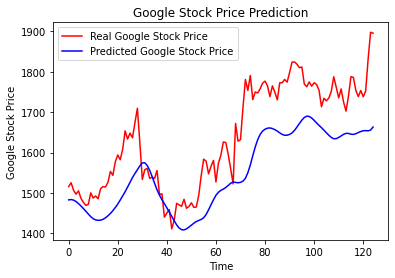

In [25]:
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Conclusion

The RNN model offers to us o good non-linear regressor  for a time series. In this notebook We've predicted the Google stock price, considering a range of 16 years to the training set and a range of 6 months to training set. As can be see, the RMSE value is very satisfactory being close to zero. Other important aspect is the time evolution of the predicted values, that presents the same dynamic evolution of the real values of the stock price for the six past months. The RNN is a powerful tool to time series with many applications.